In [20]:
import pandas as pd
from Visualization import visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
community = pd.concat([pd.read_csv('Data/crawling data/친환경_community.csv',encoding='utf-8-sig'),pd.read_csv('Data/crawling data/환경오염_community.csv',encoding='utf-8-sig')])
community_data = visualization.clean_tokenizing(community)
community_tf_idf = visualization.mk_tfidf(community_data)
community_words_freq = visualization.mk_input(community_tf_idf)
community_words_freq.to_csv('./Data/community_words_freq.csv',encoding='utf-8-sig')

단어쌍 만들기 진행중: 100%|████████████████████████████████████████████████████████| 2991/2991 [12:10<00:00,  4.09it/s]


In [15]:
dict_data_path = './Data/dict.csv'
file_path = './Data/stopwords.txt'

sent_dict = pd.read_csv(dict_data_path,encoding='utf-8-sig')
with open(file_path,'r') as op:
    stopwords = op.readlines()
    stopwords = stopwords[0].split(',')

# 시각화에 필요한 단어 빈도수 그래프
news_data = pd.read_csv('./Data/news_words_freq.csv',encoding='utf-8-sig')
community_data = pd.read_csv('./Data/community_words_freq.csv',encoding='cp949')
sns_data = pd.read_csv('./Data/sns_words_freq.csv',encoding='utf-8-sig')

['두산'] 10
        Unnamed: 0 word1 word2  freq
40455        40455    두산    환경    63
43692        43692    두산    페놀    60
65171        65171    두산    배출    46
72846        72846    두산    사업    43
74131        74131    두산    오염    43
76398        76398    두산    수소    42
86278        86278    두산    사고    39
87093        87093    두산    발전    38
101468      101468    두산    탄소    35
119041      119041    두산   환경부    31


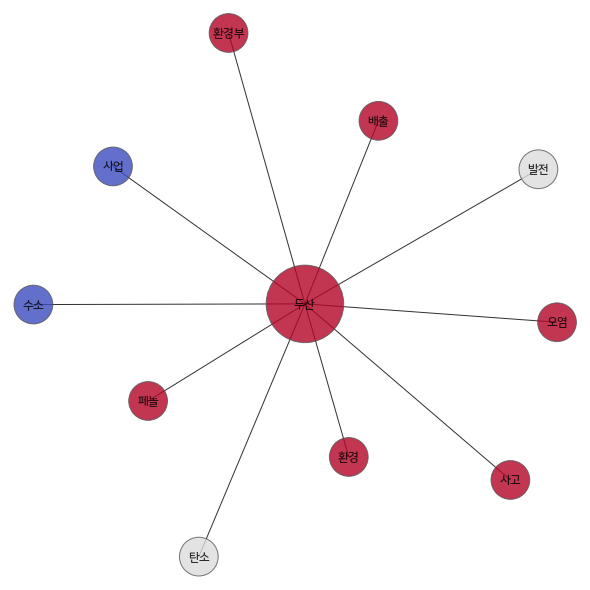

0

In [19]:
visualization.draw(news_data,sent_dict,['두산'],10)

In [8]:
sent_dict[sent_dict['회귀계수']>0][:20]

,Unnamed: 0,단어,회귀계수,points
0,2336,소재,3.953528,1.000000
1,4144,캠페인,2.982733,0.754445
2,3587,정화,2.864291,0.724486
3,1353,마련,2.738585,0.692690
4,3789,지속,2.644658,0.668932
5,2799,에코,2.624750,0.663896
6,3523,전환,2.597610,0.657031
7,4896,확대,2.552981,0.645743
8,1771,변신,2.351751,0.594843
9,2434,숲,2.348331,0.593978


In [7]:
sent_dict[sent_dict['회귀계수']<0][:20]

,Unnamed: 0,단어,회귀계수,points
2491,4916,환경오염,-5.371946,-1.000000
2492,2922,오염,-3.651343,-0.679607
2493,1526,문제,-3.165671,-0.589170
2494,4492,페놀,-3.065027,-0.570429
2495,3462,적발,-2.880503,-0.536069
2496,118,개비,-2.798210,-0.520745
2497,815,노출,-2.768219,-0.515161
2498,3800,지적,-2.581029,-0.480304
2499,4194,코인,-2.563568,-0.477052
2500,1237,때문,-2.483469,-0.462137


In [30]:
file_path = './Data/dict.csv'


In [28]:
data

,Unnamed: 0,단어,회귀계수,points
0,2336,소재,3.953528,1.000000
1,4144,캠페인,2.982733,0.754445
2,3587,정화,2.864291,0.724486
3,1353,마련,2.738585,0.692690
4,3789,지속,2.644658,0.668932
...,...,...,...,...
4704,1493,목적,-0.003178,-0.000283
4705,2257,성능,-0.002527,-0.000162
4706,4345,테마,-0.002320,-0.000123
4707,3324,입증,-0.002276,-0.000115


<BarContainer object of 10 artists>

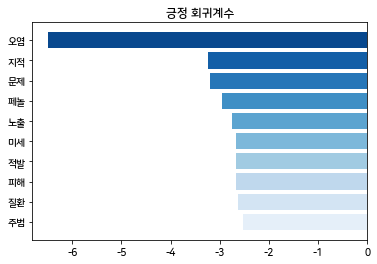

In [11]:
plt.rcParams['axes.unicode_minus'] = False

x = sent_dict['단어'][:10].tolist()[::-1]
y = sent_dict['회귀계수'][:10].tolist()[::-1]
plt.title('긍정 회귀계수')
plt.barh(x,y,color=sns.color_palette('Blues',len(x)))

<BarContainer object of 10 artists>

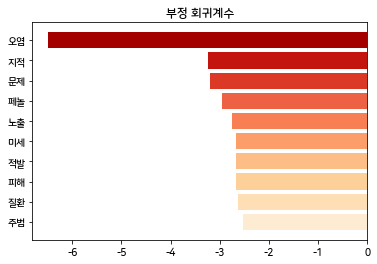

In [12]:
sent_dict =sent_dict[sent_dict['회귀계수'] < 0]
x = sent_dict['단어'][:10].tolist()[::-1]
y = sent_dict['회귀계수'][:10].tolist()[::-1]
plt.title('부정 회귀계수')
plt.barh(x,y,color=sns.color_palette('OrRd',len(x)))